In [9]:
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
COLUMN_NAME = "eval_scaled"
TABLE_NAME = "merged_shuffled_dataset"
COLUMN_NAME = "eval_not_changed"

In [11]:

# Connect to the SQLite database
db_path = '../data/chess_evals.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Query to retrieve the evals_scaled data from the evaluations table
query = f"SELECT {COLUMN_NAME} FROM {TABLE_NAME}"
# query = "SELECT stock_d1 FROM training_dataset WHERE stock_d1 NOT IN (0, -1, 1) and stock_d1 < 0.98 and stock_d1 > -0.98"
# query = "SELECT eval_scaled FROM evaluations WHERE eval_scaled NOT IN (0, -1, 1) and eval_scaled < 0.98 and eval_scaled > -0.98"
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()


OperationalError: no such table: eval_not_changed

In [ ]:
# Find indexes of None values in evals_scaled
none_indexes = [i for i, row in enumerate(data) if row[0] is None]

# Display the indexes
none_indexes

evals_scaled = [row[0] for row in data if row[0] is not None]


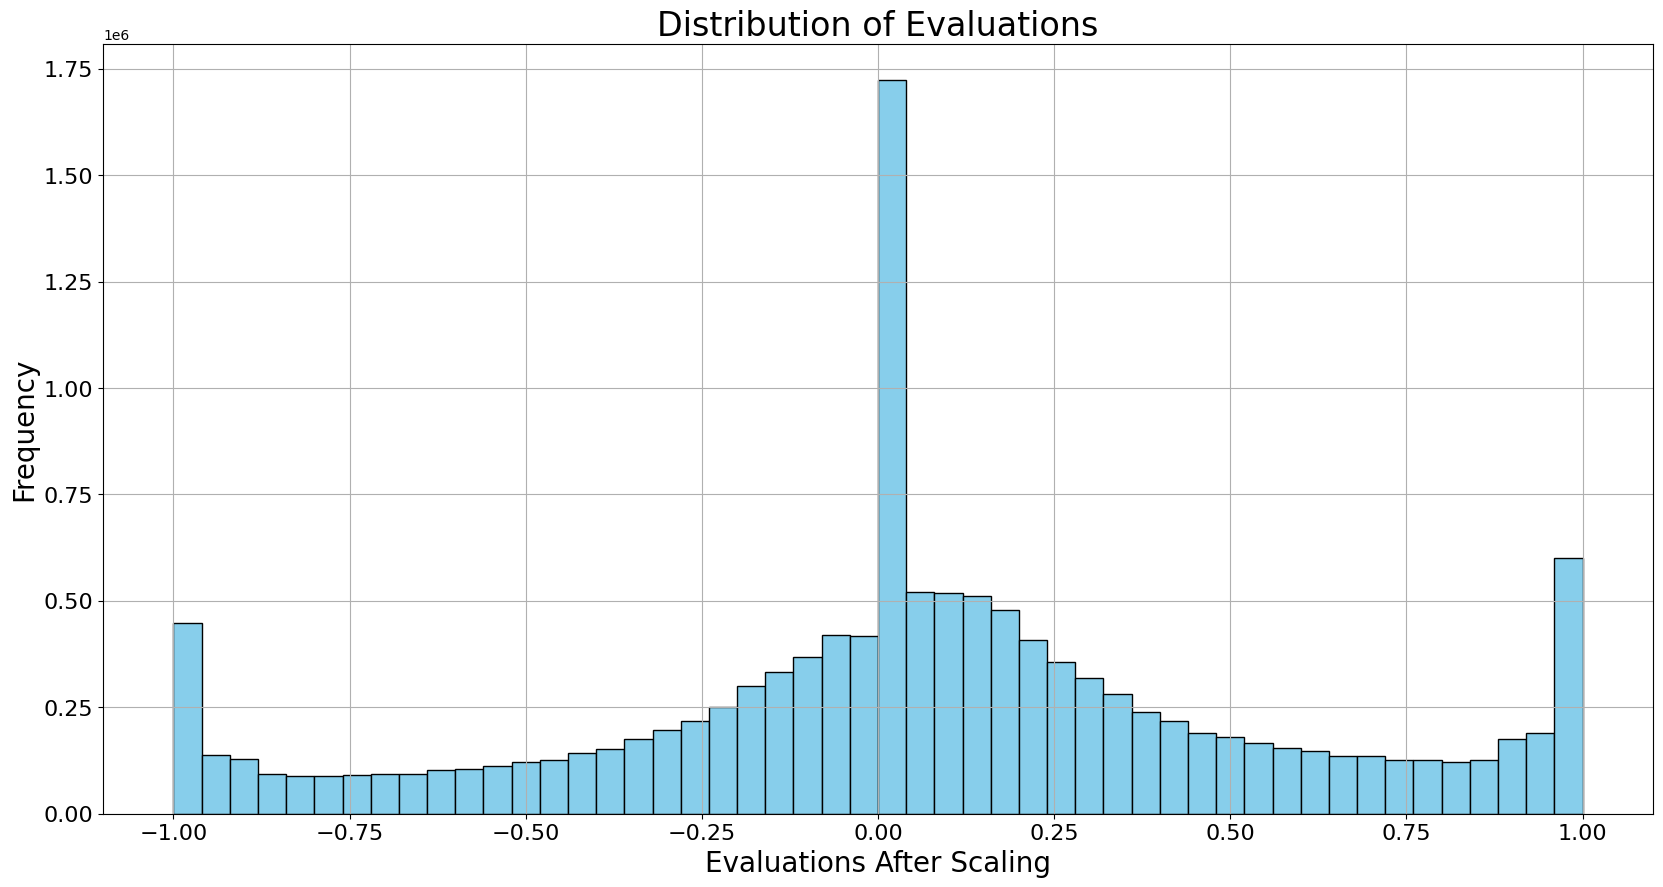

In [ ]:
# Plot the distribution
plt.figure(figsize=(20, 10))
counts, bins, patches = plt.hist(evals_scaled, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of evaluations')
plt.xlabel('evaluations after scaling')
plt.ylabel('Frequency')

plt.title('Distribution of Evaluations', fontsize=24)  # Increased title font size
plt.xlabel('Evaluations After Scaling', fontsize=20)  # Increased label font size
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=16)  # Increase tick font size
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()


In [ ]:
# Print the counts as a list
print("Counts per bin:", counts.tolist())

# Optionally, if you want to print the bin edges as well
formatted_bins = [f"{edge:.2f}" for edge in bins]
print("Bin edges:", formatted_bins)

Counts per bin: [448074.0, 137481.0, 129656.0, 93262.0, 87679.0, 89387.0, 90134.0, 93616.0, 93927.0, 101706.0, 105976.0, 112665.0, 120837.0, 126783.0, 143083.0, 152984.0, 175980.0, 196663.0, 216908.0, 250450.0, 298925.0, 333998.0, 369119.0, 419919.0, 416438.0, 1722344.0, 520798.0, 518708.0, 510433.0, 479365.0, 408924.0, 356758.0, 319302.0, 280042.0, 239272.0, 218793.0, 190570.0, 179290.0, 165814.0, 154412.0, 146713.0, 134603.0, 134483.0, 126947.0, 125759.0, 121542.0, 127233.0, 176650.0, 188942.0, 601488.0]
Bin edges: ['-1.00', '-0.96', '-0.92', '-0.88', '-0.84', '-0.80', '-0.76', '-0.72', '-0.68', '-0.64', '-0.60', '-0.56', '-0.52', '-0.48', '-0.44', '-0.40', '-0.36', '-0.32', '-0.28', '-0.24', '-0.20', '-0.16', '-0.12', '-0.08', '-0.04', '0.00', '0.04', '0.08', '0.12', '0.16', '0.20', '0.24', '0.28', '0.32', '0.36', '0.40', '0.44', '0.48', '0.52', '0.56', '0.60', '0.64', '0.68', '0.72', '0.76', '0.80', '0.84', '0.88', '0.92', '0.96', '1.00']
